# Canonical Correlation Analysis 

For this practical course we will use Canonical Correlation Analysis (CCA) to to identify and measure the associations among two sets of variables describing cars.

## The Data 

We will use the ***Cars*** data set to illustrate the CCA in this practical course. Cars is a list of **features** for **n=406 automobiles** built between 1970 and 1982. Selecting attributes which describe a car’s **physical system for the first variable set "X"** , while grouping the **performance-based variables in the second set "Y"** , we will see the relationships between design choices and various performance metrics.  
 
Since CCA can only evaluate correlations between numeric variables, the analysis will omits two columns, **Model year and Origin** which are string and categorical variables, respectively. Also note that Acceleration is a variable measuring the number of seconds required to accelerate from 0 to 60 mph, so lower values represent greater acceleration.

This data set provides an intuitive introduction to CCA because most people already have some idea of how a car’s manufacturing and performance features are related. Increasing weight, displacement, and number of cylinders all represent larger engines, which are in turn correlated with greater horsepower, lower miles per gallon (MPG), and faster acceleration. Due to the Arab oil embargos during the model years in this data set, engine sizes decreased over time to facilitate increased MPG.

## Import Libraries 

Import the libraries you usually use for data analysis.

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Data Acquisition and Pre-analysis -

### Read the "cars.txt" file using read_csv.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Check the delimiter and set the argument index_col to indicate that the first column has to be used for the row labels.
df = pd.read_csv('/content/drive/My Drive/Semestre2M1CNSA/TDAnalyseDeDonnées/ACC/cars.txt', header=0, sep=', ')
print(df)

### Check the head of the data

In [52]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


### Check the info() and describe() methods on the data

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model.year    406 non-null    float64
 7   origin        406 non-null    float64
dtypes: float64(8)
memory usage: 25.5 KB


In [54]:
n = df.shape[0]
d =  df.shape[1]
print(n)
print(d)
df.shape

406
8


(406, 8)

In [55]:
print(df["mpg"].isnull().sum())
print(df["horsepower"].isnull().sum())

8
6


 

 **Dimension** : 
Ce dataset a 406 observations et 8 variables dont le type est numérique (float-64).

**Les valeurs manquates :**

**horsepower** possède 6 valeurs manquantes et  **mpg** : possède 8 valeurs manquantes. Les 6 autres variables n'ont pas de valeurs manquantes.

### Creating a pairplot of the data set

<u> Goal:</u> Analyze the correlation of the all set of variables

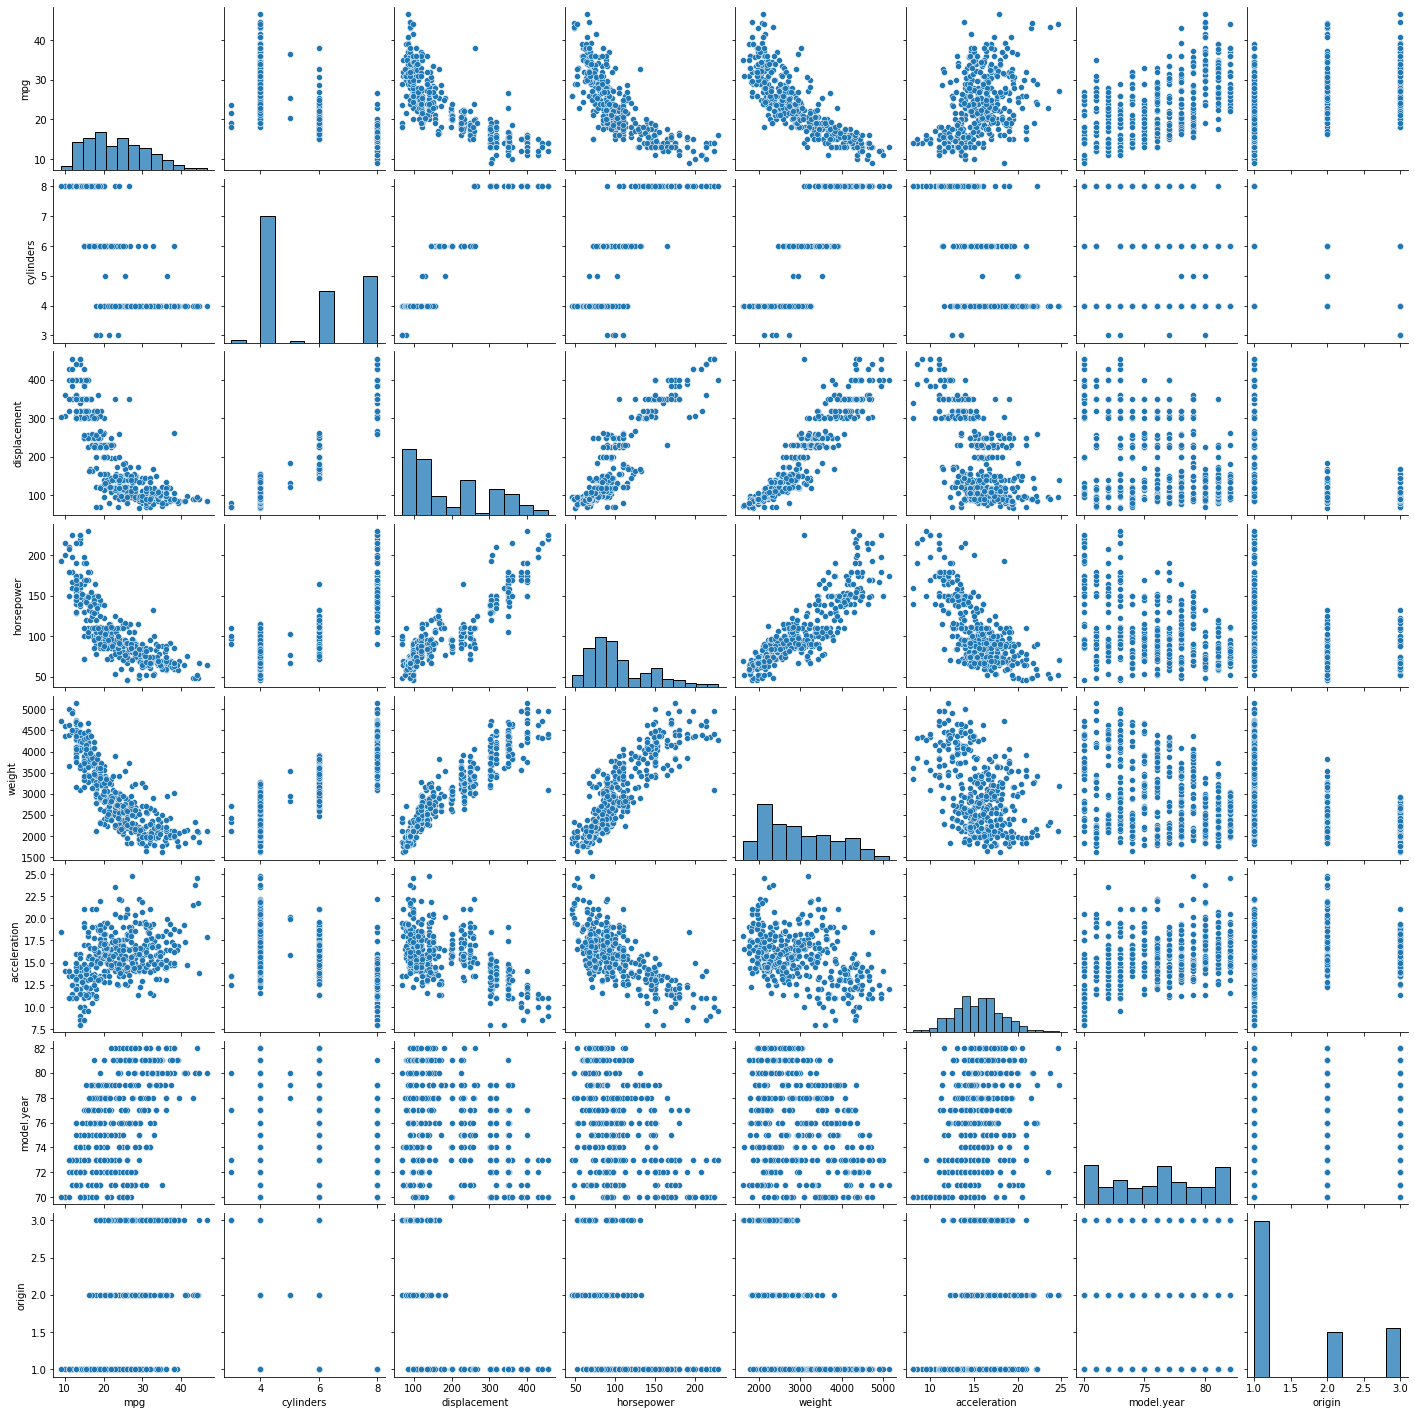

In [38]:
import seaborn as sns
sns.pairplot(df,palette='Dark2')

In [39]:
# Correlation matrix visualization
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm') 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model.year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419,-0.460033
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992,0.218845
model.year,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000,0.187656
origin,0.563450,-0.567478,-0.613056,-0.460033,-0.584109,0.218845,0.187656,1.000000


**TO COMPLETE** 
### **- mpg :**  cette variable est  liées mais par un relation non linéaire et monotone aux variables "displacement" , horsepower" et "weight" , l'intencité est faible (r un peu éloigné de -1), les points peuvent être rapprochée d'une droite mais actuellement ne forme pas une droite. il y a un absence de linéarité avec les autres variables.
### **- Cylenders :** il y a un absence de linéarité avec toutes les variables.
### **- Displacement :**  cette variable est  liées mais par une relation non linéaire et monotone avec la variable "mpg", l'intencité est faible.  elle a une relation linéaire avec "horsepower" et "weignt" dans un sense positif avec une intensité forte. et aucune relation de linéarité avec les autres. 

### **- Horsepower :**  cette variable est  liées mais par une relation non linéaire et monotone avec la variable "mpg".  elle a une relation linéaire avec "displacement" et "weignt" dans un sense positif, et dans un sens négatif avec "acceleration",  avec une intensité forte. et aucune relation de linéarité avec les autres.

### **- weight : **  cette variable est  liées mais par un relation non linéaire et monotone aux variables "displacement" , horsepower" et "mpg" , l'intencité est faible (r un peu éloigné de -1 et de 1), les points peuvent être rapprochée d'une droite mais actuellement ne forme pas une droite.

### **- Origin et model :**  sont linéerement indépendantes avec toutes les autres variables





## Data Preparation - 

**Explain what you will do** 

 1) Imputation des données manquantes par  la moyenne de chacune des variables présantant des NAN

 2) centrer et réduire les données

 3) Diviser les données en deux groupes


In [40]:
from sklearn.impute import SimpleImputer
cols = df.columns
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df = imp_mean.fit_transform(df)
df = pd.DataFrame(df, columns =  cols)
print(df.isnull().sum().sum())

0


####  Standardize the data (centrage-réduction) 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df = df.drop(axis=1, columns={"model.year","origin"})
cols= df.columns
scaler.fit(df)
scaled_data = scaler.transform(df)
scaled_data = pd.DataFrame(data = scaled_data , columns = cols )

### **Split the data into two groupes**

In [ ]:
#X : car's physical system
#Y : Performance-based variables
X = scaled_data[["cylinders","displacement","weight"]]
p=X.shape[1]
print("p:",p)
print("n:",X.shape[0])
print(n==X.shape[0])
Y = scaled_data[["mpg","acceleration","horsepower"]]
q=Y.shape[1]
print("q:",q)
print("n:",Y.shape[0])
print(n==Y.shape[0])

p: 3
n: 406
True
q: 3
n: 406
True


## ACC application - 

Next steps:
   - Apply CCA (with or without sklean package) - 6 points
   
   - Draw and analyze the correlation circle [*fr: graphe des variables*] - 3.5 points
   - Draw and analyze the observation graph [*fr: graphe des individus*] - 3.5 points

**N.B: Create as many cells as you need.**

### Apply CCA (with or without sklean package)
<font color="red"> /!\ Don't forget to split the dataset into two groups </font>

#### Remind briefly the objective and the steps of CCA

### **- Objective:** 
- find linear combinations (canonical variables) of two sets of variables that are as correlated as possible.

- Mettre en avant des relations de proximité entre deux (2) ensembles de variables, et donc trouver une relation entre les deux groupes 

### **- Steps:** 
1) Standardize the data (centrage-réduction)  --> done before the data split

2) Calculate the intra and inter group covariances (or correlation), i.e., $V_{XX}$ (Dim: p x p), $V_{YY}$ (Dim: q x q), $V_{XY}$ (Dim: p x q), $V_{YX}$ (Dim: q x p). 

3) Calculate $R_x$ (Dim: pxp) et $R_y$ (Dim: qxq) 

4) Calculate the eigenvalues $\lambda_k$ and eigenvectors $a_k$, $b_k$ respectively for $R_x$ and $R_y$ 

5) Calculate the canonical components $U_k$ and $V_k$

All these steps are implemented in Sklean in one procedure 




In [44]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=2)
cca

CCA(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [45]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=2,scale= False) # n_components = 2 car on a deux ensemble X et Y, scale = True par défaut pour centrer et réduire, mais nous l'avons fait avant
cca.fit(X, Y)
U_, V_ = cca.transform(X, Y)
#print(U_)
#print(V_)
corr_cca2 = pd.DataFrame(np.corrcoef(U_.T, V_.T),index=["$U_1$","$U_2$","$V_1$","$V_2$"],columns=["$U_1$","$U_2$","$V_1$","$V_2$"])
corr_cca2.style.background_gradient(cmap='coolwarm') 

,$U_1$,$U_2$,$V_1$,$V_2$
$U_1$,1.000000,0.000000,0.927819,-0.000000
$U_2$,0.000000,1.000000,0.000031,0.431828
$V_1$,0.927819,0.000031,1.000000,-0.000000
$V_2$,-0.000000,0.431828,-0.000000,1.000000


#### Comment the correlation table between $U_k$ and $V_k$

-la correlation entre U1 (respectivement U2, V1 et V2) est parfaite avec lui même et vaut 1 car chaque composante ou bien en général chaque variable est fortement corrélée à elle même. 

- La corrélation entre U1 et U2 (respectivement entre V1 et V2 ) est nule car les deux composantes sont orthogonales (cos(90) = 0 )

- U1 est fortement corrélée à V1 mais aucune corrélation avec V2. Par contre U2 n'est pas fortement corrélée ni à V1 ni à V2, elle est faiblement corrélée avec V2 et a une corrélation presque nule avec V1


#### What are the eigenvectors *$a_k$* and *$b_k$* ?

In [46]:
ak = cca.x_rotations_
bk = cca.y_rotations_
print("les vecteurs propres de Rx", ak)
print("-----------------")
print("les vecteurs propres de Ry",bk)


les vecteurs propres de Rx [[-0.131159   -0.02527744]
 [ 0.69298941  0.72113885]
 [ 0.70891677 -0.69243635]]
-----------------
les vecteurs propres de Ry [[-0.34397412  0.45098747]
 [ 0.1972482  -1.00582744]
 [ 0.91802775 -0.1438162 ]]


### Correlation circle

##### Compute the correlation between the principal components and the variables

In [47]:
# Compute the axes
C1 = np.array((1/2)*(U_[:,0]+V_[:,0]))
print("Dim C1: ", C1.shape)
C2 = np.array((1/2)*(U_[:,1]+V_[:,1]))
print("Dim C2: ",C2.shape)
Caxes =  np.array([C1,C2])
print(Caxes.shape)

# Compute the correlation of the variables with the axes
corvar = np.corrcoef(Caxes, scaled_data.T) # we use the scaled data 

pd.DataFrame(corvar,index=["$C_1$","$C_2$","$X_1$","$X_2$","$X_3$","$Y_1$","$Y_2$","$Y_3$"],columns=["$C_1$","$C_2$","$X_1$","$X_2$","$X_3$","$Y_1$","$Y_2$","$Y_3$"]).style.background_gradient(cmap='coolwarm')

Dim C1:  (406,)
Dim C2:  (406,)
(2, 406)


,$C_1$,$C_2$,$X_1$,$X_2$,$X_3$,$Y_1$,$Y_2$,$Y_3$
$C_1$,1.000000,0.000004,-0.867165,0.911803,0.963659,0.942276,0.970314,-0.523544
$C_2$,0.000004,1.000000,0.165321,0.100857,0.125792,0.234832,-0.104306,-0.804607
$X_1$,-0.867165,0.165321,1.000000,-0.762698,-0.791268,-0.758059,-0.823327,0.409338
$X_2$,0.911803,0.100857,-0.762698,1.000000,0.951787,0.840140,0.895220,-0.522452
$X_3$,0.963659,0.125792,-0.791268,0.951787,1.000000,0.894719,0.932475,-0.557984
$Y_1$,0.942276,0.234832,-0.758059,0.840140,0.894719,1.000000,0.862617,-0.692274
$Y_2$,0.970314,-0.104306,-0.823327,0.895220,0.932475,0.862617,1.000000,-0.430086
$Y_3$,-0.523544,-0.804607,0.409338,-0.522452,-0.557984,-0.692274,-0.430086,1.000000


mpg
-0.8671649057770285
0.16532080915609929
cylinders
0.9118032077627424
0.1008570871875022
displacement
0.9636592672871113
0.12579194521623396
horsepower
0.942275792030499
0.23483150081548684
weight
0.9703135082895102
-0.10430585720514131
acceleration
-0.5235441082474304
-0.8046069391835345


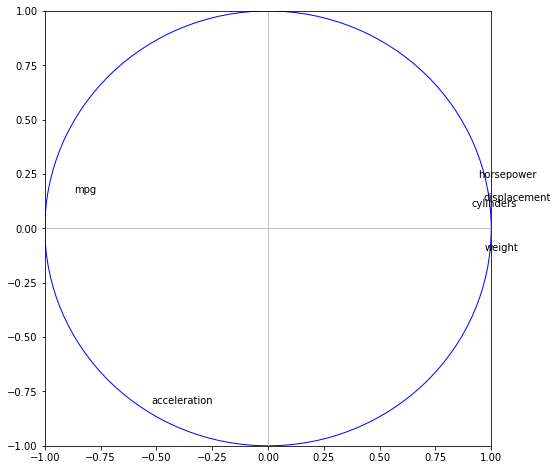

In [48]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
# Print the labels (variable names)
for j in range(q+p):
    print(df.columns[j])
    print(corvar[j+2,0])
    print(corvar[j+2,1])
    plt.annotate(df.columns[j],(corvar[j+2,0],corvar[j+2,1]))

# Add the axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

# Add a circle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
# Print the correlation circle
plt.show()

**INTERPRET** (Click two times to edit)

Les variables : **weight**, **horsepower**, **displacement** et **cylinder** sont parfaitement corrélées à la composante C1 (dans un sens positif), la variable **mpg** est fortement corrélée a C1 (dans un sense négatif), mais toutes ces variables sont faiblement corrélées à l'axe de la composante C2.

La variable **acceleration** est fortement corrélée à l'axe de la composante C2 (dans un sens négatif) mais faibelement corrélée avec l'axe de la composante C1.

les variables **horsepower**, **displacement** et **cylinder** sont fortement corrélées entre elles et même avec **weight**. il y a aussi une forte corrélation de **horsepower**, **displacement** et **cylinder**  avec **mpg** dans un sense opposé. 






#### Observation visualization
<!-- Interpréter les résultats -->

Text(0, 0.5, 'Second CCA Components')

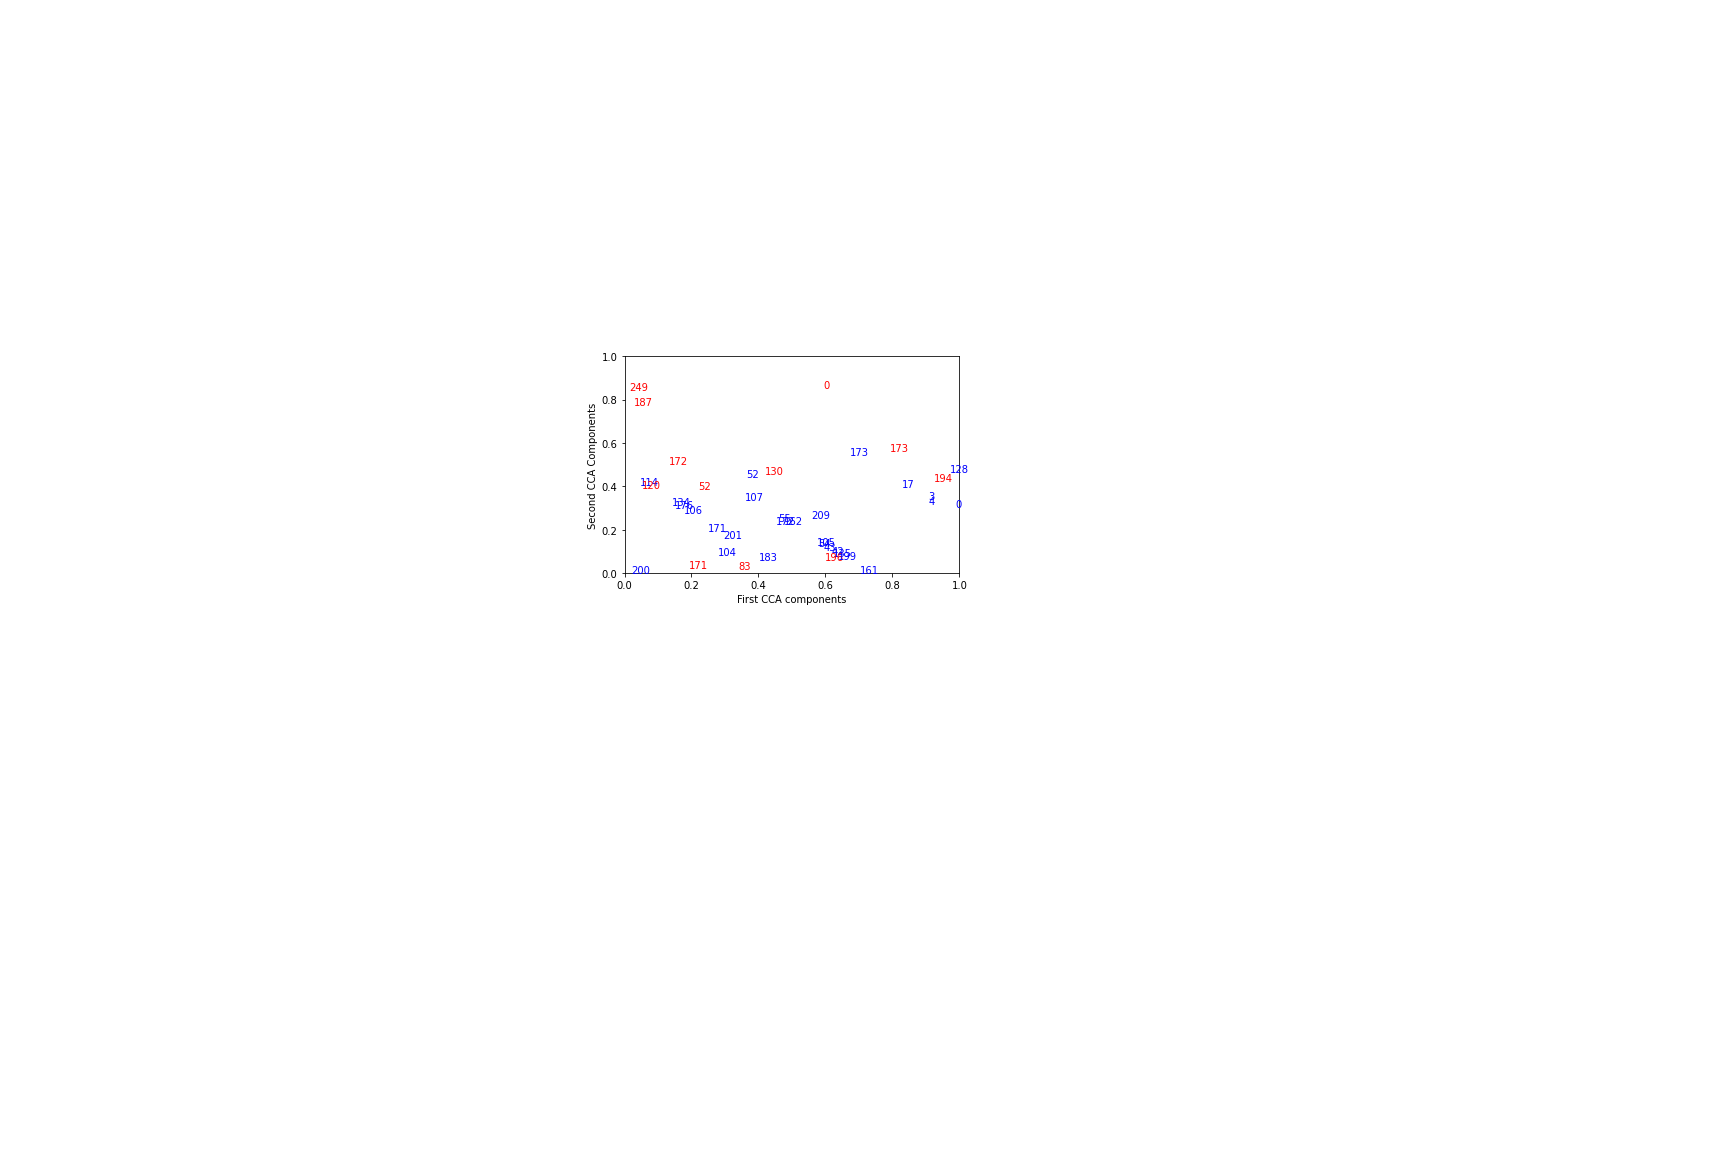

In [49]:
from matplotlib.pyplot import figure
fig, axes = plt.subplots()
U1 = U_[:,0]
V1 = V_[:,0]
U2 = U_[:,1]
V2 = V_[:,1]
for i in range(250):
    plt.annotate(i, (U1[i],U2[i]), color="b")
    plt.annotate(i, (V1[i],V2[i]), color="r")

plt.xlabel('First CCA components')
plt.ylabel('Second CCA Components')


**INTERPRET** 

Si on prend la voiture **"0"** on remarque que leurs représentations sont trés éloignées donc on a pas une corrélation entre les variable de (X , Y ) pour cet individu et c'est le cas de la majorité des individus. 

Mais on a aussi certains individus pour lesquels les représentations sont proches dans ce cas on dit qu'il y a une correlation entre les variables de X et Y pour ces individus; c'est le cas de la voiture **"173"**
